# Lab 1 : First order methods on regression models

#### Authors: A. Gramfort, R. Gower, P. Ablin, M. Massias, Q. Bertrand, N. Gazagnadou

## Aim

The aim of this material is to code 
- proximal gradient descent (PGD)
- accelerated proximal gradient descent (APGD) 

for 
- linear regression
- logistic regression 

models.

The proximal operators we will use are the 
- L2 penalization
- L1 penalization

## VERY IMPORTANT

- This work **must be done by pairs of students**.
- **Each** student must send their work **before the 6th of october at 21:59**, using the **moodle platform**.
- This means that **each student in the pair sends the same file**
- On the moodle, in the "Optimization for Data Science" course, you have a "devoir" section called **Rendu TP du 30 septembre 2019**. This is where you submit your jupyter notebook file. 
- The **name of the file must be** constructed as in the next cell

# Gentle reminder: no evaluation if you don't respect this EXACTLY

### How to construct the name of your file

In [1]:
# Change here using YOUR first and last names
fn1 = "seyni"
ln1 = "diop"
fn2 = "bakary"
ln2 = "sidibé"

filename = "_".join(map(lambda s: s.strip().lower(), 
                        ["lab1", ln1, fn1, "and", ln2, fn2])) + ".ipynb"
print(filename)

lab1_diop_seyni_and_sidibé_bakary.ipynb


In [0]:
## to embed figures in the notebook
%matplotlib inline

## Part 0 : Introduction

We'll start by generating sparse vectors and simulating data

### Generating sparse coefficients

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm
np.set_printoptions(precision=2)  # to have simpler print outputs with numpy
import warnings
warnings.filterwarnings('ignore')

Text(0.5, 1.0, 'Parameters / Coefficients')

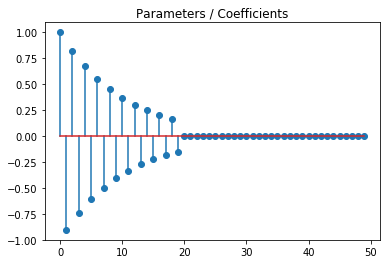

In [4]:
n_features = 50
n_samples = 1000
idx = np.arange(n_features)
coefs = ((-1) ** idx) * np.exp(-idx / 10.)
coefs[20:] = 0.
plt.stem(coefs)
plt.title("Parameters / Coefficients")

### Functions for the simulation of the models

In [0]:
from numpy.random import multivariate_normal
from scipy.linalg.special_matrices import toeplitz
from numpy.random import randn


def simu_linreg(coefs, n_samples=1000, corr=0.5):
    """Simulation of a linear regression model
    
    Parameters
    ----------
    coefs : `numpy.array`, shape (n_features,)
        Coefficients of the model
    
    n_samples : `int`, default=1000
        Number of samples to simulate
    
    corr : `float`, default=0.5
        Correlation of the features

    Returns
    -------
    A : `numpy.ndarray`, shape (n_samples, n_features)
        Simulated features matrix. It samples of a centered Gaussian 
        vector with covariance given by the Toeplitz matrix
    
    b : `numpy.array`, shape (n_samples,)
        Simulated labels
    """
    # Construction of a covariance matrix
    cov = toeplitz(corr ** np.arange(0, n_features))
    # Simulation of features
    A = multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    # Simulation of the labels
    b = A.dot(coefs) + randn(n_samples)
    return A, b

def sigmoid(t):
    """Sigmoid function"""
    return 1. / (1. + np.exp(-t))

def simu_logreg(coefs, n_samples=1000, corr=0.5):
    """Simulation of a logistic regression model
    
    Parameters
    ----------
    coefs : `numpy.array`, shape (n_features,)
        Coefficients of the model
    
    n_samples : `int`, default=1000
        Number of samples to simulate
    
    corr : `float`, default=0.5
        Correlation of the features

    Returns
    -------
    A : `numpy.ndarray`, shape (n_samples, n_features)
        Simulated features matrix. It samples of a centered Gaussian 
        vector with covariance given by the Toeplitz matrix
    
    b : `numpy.array`, shape (n_samples,)
        Simulated labels
    """
    cov = toeplitz(corr ** np.arange(0, n_features))
    A = multivariate_normal(np.zeros(n_features), cov, size=n_samples)
    p = sigmoid(A.dot(coefs))
    b = np.random.binomial(1, p, size=n_samples)
    b = 2 * b - 1
    return A, b

## Generate the data

In [0]:
A, b = simu_linreg(coefs);
# A, b = simu_logreg(coefs);  # uncomment when you want to test logistic regression

## Part 1 : Proximal operators

We remind that the proximal operator of a function $R$ is given by:

$$
\text{prox}_{\lambda\,R}(x) = \arg\min_z \left\{ \frac{1}{2} \Vert x - z\Vert_2^2 + \lambda \,R(z) \right\}.
$$


We have in mind to use the following cases

- L2 penalization: $\lambda\, R(z) = \frac{\lambda}{2} \|z\|_2^2$
- L1 penalization: $\lambda\, R(z) = \lambda\|z|\|_1$

where $\lambda \geq 0$ is a regularization parameter.

<div class="alert alert-success">
    <b>Questions</b>:
     <ul>
      <li>Code a function that computes $\lambda \, R(x)$ in both cases and $\text{prox}_{\lambda\, R}(x)$ for L2 and  L1 penalization (use the slides of the first course to get the formulas), using the prototypes given below</li>
     <li>Hint: for the prox of the L1 norm you can either use the formula from the course or rewrite it with np.max and np.sign functions
    </li>
      <li>Visualize the identity function and the proximity operators of the L2 and L1 on the real axis
    </li>
    </ul>
</div>

In [0]:
def prox_L1(x, lmbd):
    """Proximal operator for the L1 at x"""
    z = np.sign(x)*np.maximum(np.abs(x)-lmbd,0.)# TODO
    return z

def L1_norm(x, lmbd):
    """Value of the L1 penalization at x"""
    z = lmbd*np.linalg.norm(x,ord = 1)
    return z # TODO

def prox_L2(x, lmbd):
    """Proximal operator for the L2 at x"""
    z = x /(1+lmbd)# TODO
    return z

def L2_norm(x, lmbd):
    """Value of the L2 penalization at x"""
    z = lmbd/2*np.linalg.norm(x , ord = 2)
    return z # TODO

<function matplotlib.pyplot.show>

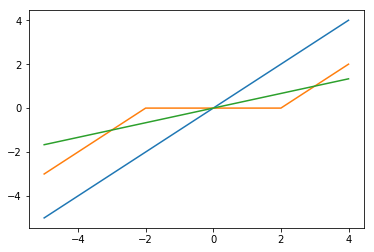

In [8]:
# Plots TODO
identity=np.arange(-5,5,1)

plt.plot(identity,identity)
plt.plot(identity, prox_L1(identity,2))
plt.plot(identity, prox_L2(identity,2))

plt.show

## Visualization

We are now going to visualize the effect of the proximity operators on coefficients.

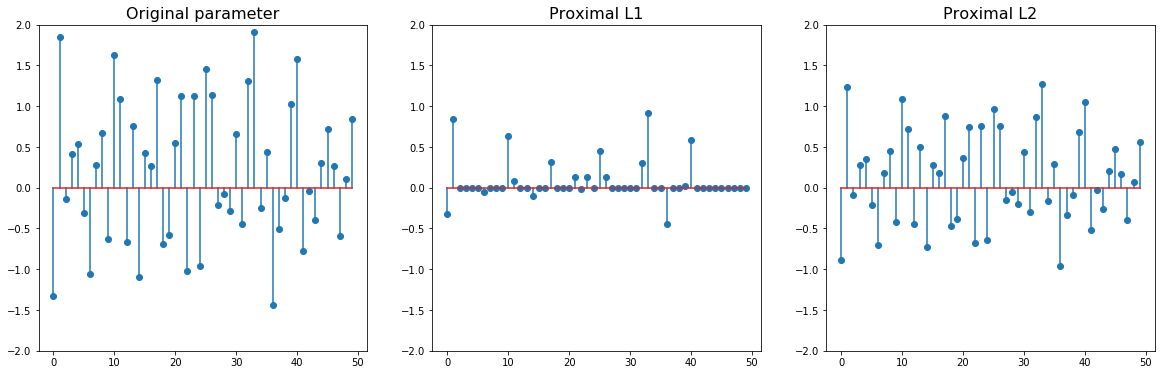

In [9]:
x = randn(50)
l_l1 = 1.
l_l2 = 0.5

plt.figure(figsize=(20.0, 6.0))
plt.subplot(1, 3, 1)
plt.stem(x)
plt.title("Original parameter", fontsize=16)
plt.ylim([-2, 2])
plt.subplot(1, 3, 2)
plt.stem(prox_L1(x, lmbd=l_l1))
plt.title("Proximal L1", fontsize=16)
plt.ylim([-2, 2])
plt.subplot(1, 3, 3)
plt.stem(prox_L2(x, lmbd=l_l2))
plt.title("Proximal L2", fontsize=16)
plt.ylim([-2, 2])
plt.show()

<div class="alert alert-success">
    <b>Question</b>:
     <ul>
      <li>Comment what you observe (1 or 2 sentences).</li>
    </ul>
</div>

<b> <font color="blue" size=4px >Answer</font></b>

***The proximal of norm 1 (Lasso) returns more zero coefficients. Coefficients with small values (absolute values lower than lambda) are set to zero. With the L2 standard, we can see that the coefficients are multiplied only by a scale factor equal to $\frac{1}{1+\lambda}$***

## Part 2: Gradients

The problems we want to minimize take the form:
$$
\arg\min_x f(x) + \lambda \,R(x)
$$
where $f$ is $L$-smooth and $R$ is prox friendly.

Consider the following cases:

**Linear regression**, where 
$$
f(x) = \frac{1}{2n} \sum_{i=1}^n (b_i - a_i^\top x)^2 = \frac{1}{2 n} \| b - A x \|_2^2,
$$
where $n$ is the sample size, $b = [b_1 \cdots b_n]$ is the vector of labels and $A^\top = [a_1,\ldots, a_n] \in \mathbb{R}^{d \times n}$ is the matrix of features.

**Logistic regression**, where
$$
f(x) = \frac{1}{n} \sum_{i=1}^n \log(1 + \exp(-b_i a_i^\top x)),
$$
where $n$ is the sample size, and where labels $b_i \in \{ -1, 1 \}$ for all $i$.

We need to be able to compute $f$ and its gradient $\nabla f$

<div class="alert alert-success">
    <b>Questions</b>:
     <ul>
      <li>Compute on paper the gradient $\nabla f$ of $f$ for both cases (linear and logistic regression)</li>
      <li>Code a function that computes $f$ and its gradient $\nabla f$ in both cases, using the prototypes below.</li>
      <li>Check that these loss functions are correct by numerically checking their ouputs</li>
      <li>Check that these functions are correct by numerically checking the gradient, using the function ``<a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.check_grad.html">check_grad</a>`` from ``scipy.optimize``. Remark: use the functions `simu_linreg` and `simu_logreg` to simulate data according to the right model</li>
    </ul>
</div>

**Linear regression gradient**
$$\nabla f =\frac{1}{n}A^T(Ax-b)$$

**Logisteic regression gradient**
$$\nabla f =-\frac{1}{n}\sum\frac{exp(-b_i\odot a_i^\top x)}{1+exp(-b_i\odot a_i^\top x)}\odot b_i\odot a_i^\top=-\frac{1}{n}\sum\frac{1}{1+exp(b_i\odot a_i^\top x)}\odot b_i\odot a_i^\top$$


In [0]:
# TO BE COMPLETED
n = n_samples
def loss_linreg(x):
    """Least squares loss"""
    # TODO
    return np.sum(np.square(b-A.dot(x)))/(2*n)
    pass

def grad_linreg(x):
    """Least squares gradient"""
    # TODO
    return np.dot(A.T, A.dot(x)-b)/n
    pass

def loss_logreg(x):
    """Logistic loss"""
    # TODO
    return np.sum(np.log(1+np.exp(-b*np.dot(A,x))))/n


def grad_logreg(x):
    """Logistic gradient"""
    # TODO
    return np.sum(-b*A.T/(1 + np.exp(b * np.dot(A, x))),axis=1)/n


<b> <font color="blue" size=2px >Checking gradient loss</font></b> 

In [11]:
from scipy.optimize import check_grad

#linear regression
A, b = simu_linreg(coefs);
print('linear gradient check: ', check_grad(loss_linreg,grad_linreg,x))

# logistic regression
A, b = simu_logreg(coefs);  # uncomment when you want to test logistic regression
print('logistic gradient check: ', check_grad(loss_logreg,grad_logreg,x))

linear gradient check:  1.3545561916628161e-06
logistic gradient check:  1.3354243458337979e-07


## Part 3: Solvers

We know have a function to compute $f$, $\nabla f$ and $R$ and $\text{prox}_{\lambda R}$. 

We want now to code the PGD and APGD solvers to minimize

$$
\arg\min_x f(x) + \lambda \, R(x)
$$

where $\lambda >0$ is the regularization parameter

<div class="alert alert-success">
    <b>Questions</b>:
     <ul>
      <li>Compute on paper the Lipschitz constant for linear and logistic regression losses. Remark: for the logistic regression, you should try to upper bound the second derivative</li>
      <li>Hint: the computation of the Lipschitz constant for the linear regression should be easy (cf course).
         But the computation of the Lipschitz constant for the logistic regression may be trickier. 
                 You may want to write $f$ as $f(x) = \frac{1}{n} \sum_i \phi(b_i a_i^\top x)$, and then show that $|\phi''| \leq \frac{1}{4}$.</li>
      <li>Implement functions that compute the Lipschitz constant for both cases (linear and logistic regression). Note that the operator norm of a matrix can 
  be computed using the function <a href="https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html">numpy.linalg.norm</a> (Be careful with the norm you chose! Read the documentation
  of the function)</li>
      <li>Finish the functions `PGD` and `APGD` below that implements the 
  PGD (Proximal Gradient Descent) and APGD (Accelerated Proximal 
  Gradient Descent) algorithms.
       Note: PGD is sometimes called ISTA (Iterative Soft Thresholding Algorithm) and APGD is sometimes called FISTA (Fast ISTA)</li> 
    </ul>
</div>

<b> <font color="blue" size=4px >Answer</font></b>

* **Lipchitz constant of linear regression**
$$\left\lVert \nabla f(x) - \nabla f(y)\right\rVert 
= \left\lVert \frac{1}{n}A^T(Ax -b) - \frac{1}{n}A^T(Ay -b)\right\rVert 
= \left\lVert \frac{1}{n}A^TA(x-y)\right\rVert 
\leq \frac{1}{n}\sigma_{max}(A)\left\lVert A^T(x - y)\right\rVert \leq \frac{1}{n}\sigma_{max}^2(A) \left\lVert x - y\right\rVert$$
 Then $L_{linreg}=\frac{1}{n}\sigma_{max}^2(A) \left\lVert x - y\right\rVert$
* **Lipchitz constant of logistic regression**

$$f(x)=\frac{1}{n} \sum_i \phi(b_i a_i^\top x)$$ with $\phi(x)=log(1+exp(-x))$

After two derivations of $\phi$ we obtain $\phi''(x)=\frac{e^x}{(1+e^x)^2}$

$\left(1-e^{x}\right)^{2} \geq 0 \Rightarrow 1+e^{2 x} \geq 2 e^{x} \Rightarrow 1+e^{2 x}+2 e^{x} \geq 4 e^{x} \Rightarrow\left(1+e^{x}\right)^{2} \geq 4 e^{x} \Rightarrow \frac{e^{x}}{\left(1+e^{x}\right)^{2}}=\phi^{\prime \prime}(x) \leq \frac{1}{4}$

$$\nabla f(x)=\frac{1}{n}\sum{b_ia_i\phi'(b_ia_i^Tx)}$$
$$Jacobien(\nabla f(x))=\frac{1}{n}\sum{(b_i)^2a_ia_i^T\phi^{\prime \prime}(b_ia_i^Tx)}=\frac{1}{n}\sum{a_ia_i^T\phi^{\prime \prime}(b_ia_i^Tx)}$$

Then $$L_{logreg}= \frac{1}{4}\sigma_{max}(\frac{1}{n}A^TA)$$

In [0]:
# TO BE COMPLETED

# Calculate the smoothness constant for least squares loss
def smoothness_const_linreg(A):
    """Lipschitz constant for least squares loss"""    
    # TODO
    return (np.linalg.norm(A,ord=2)**2)/n
  
# Calculate the smoothness constant for logistic loss    
def smoothness_const_logreg(A):
    """Lipschitz constant for logistic loss"""    
    # TODO
    return (np.linalg.norm(1/n*A.T@A,ord=2))/4
    pass
    
def PGD(x0, f, grad_f, R, prox_R, step, lmbd=0., n_iter=50,
         x_true=coefs, verbose=True):
    """Proximal gradient descent algorithm"""
    x = x0.copy()
    n_samples, n_features = A.shape

    # estimation error history
    errors = []
    # objective history
    objectives = []
    # Current estimation error
    err = norm(x- x_true) / norm(x_true)
    errors.append(err)
    # Current objective
    obj = f(x) + R(x, lmbd)
    objectives.append(obj)
    if verbose:
        print("Lauching PGD solver...")
        print(' | '.join([name.center(8) for name in ["it", "obj", "err"]]))
    for k in range(n_iter + 1):

        #### TODO ####
        x_new = prox_R(x - grad_f(x)/step, lmbd/step)
        x=x_new
        obj = f(x) + R(x, lmbd)
        err = norm(x - x_true) / norm(x_true)
        errors.append(err)
        objectives.append(obj)
        if k % 10 == 0 and verbose:
            print(' | '.join([("%d" % k).rjust(8), 
                              ("%.2e" % obj).rjust(8), 
                              ("%.2e" % err).rjust(8)]))
    return x, objectives, errors

In [0]:
# TO BE COMPLETED

def APGD(x0, f, grad_f, R, prox_R, step, lmbd=0., n_iter=50,
         x_true=coefs, verbose=True):
    """Accelerated Proximal gradient descent algorithm"""
    x = x0.copy()
    x_new = x0.copy()
    # An extra variable is required for APGD
    z = x0.copy()
    n_samples, n_features = A.shape
    # estimation error history
    errors = []
    # objective history
    objectives = []
    # Current estimation error
    err = norm(x - x_true) / norm(x_true)
    errors.append(err)
    # Current objective
    obj = f(x) + R(x, lmbd)
    objectives.append(obj)
    t = 1.
    t_new = 1.    
    if verbose:
        print("Lauching APGD solver...")
        print(' | '.join([name.center(8) for name in ["it", "obj", "err"]]))
    for k in range(n_iter + 1):

        #### TODO ####
        x_new = prox_R(z - grad_f(z)/step, lmbd/step)
        t_new = (1+ np.sqrt(1 + 4* t**2))/2
        z = x_new + ((t -1)/t_new) * (x_new - x)
        
        x = x_new
        t = t_new
        
        obj = f(x) + R(x, lmbd)
        err = norm(x - x_true) / norm(x_true)
        errors.append(err)
        objectives.append(obj)
        if k % 10 == 0 and verbose:
            print(' | '.join([("%d" % k).rjust(8), 
                              ("%.2e" % obj).rjust(8), 
                              ("%.2e" % err).rjust(8)]))
    return x, np.array(objectives), np.array(errors)

## Algorithms comparison and numerical experiments

In [0]:
# Some definitions before launching the algorithms
x0 = np.zeros(n_features)
n_iter = 40
lmbd = 1e-2

<div class="alert alert-success">
    <b>Questions</b>:
     <ul>
      <li>Compute a precise minimum and a precise minimizer of the problem (linear regression or logistic regression) using the parameters given above. This can be done by using APGD with 1000 iterations and setting `x_true` to `coeffs`.</li>
    <li>Compare the convergences of PGD and APGD, in terms of distance to the minimum and 
  distance to the minimizer you have computed. Do your plots using a logarithmic scale of the y-axis.</li>
    </ul>
</div>

**Let's do an example using linear regression as minimizer**

In [0]:
A, b = simu_linreg(coefs)

In [16]:
apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L1_norm,
                                prox_R=prox_L1, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)
print("The minimum is given by \n" ,apgd_x_hat)

The minimum is given by 
 [ 9.73e-01 -8.75e-01  7.77e-01 -6.95e-01  5.96e-01 -4.95e-01  4.74e-01
 -4.79e-01  4.45e-01 -3.84e-01  3.39e-01 -3.12e-01  2.28e-01 -2.32e-01
  2.38e-01 -1.93e-01  1.70e-01 -1.11e-01  7.92e-02 -1.02e-01  0.00e+00
  2.28e-03 -1.69e-02 -0.00e+00 -0.00e+00 -0.00e+00 -1.30e-03  2.78e-03
 -9.01e-02  2.30e-02  7.71e-02 -5.08e-02 -6.17e-02  4.02e-02  2.27e-04
 -1.31e-03 -1.23e-02  4.08e-02 -6.27e-02  3.44e-02  7.44e-02 -0.00e+00
 -1.96e-02 -4.23e-02  0.00e+00 -1.35e-02  0.00e+00  0.00e+00  1.67e-02
 -2.82e-02]


In [17]:
pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L1_norm,
                                prox_R=prox_L1, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)

print("With the APGD algorithm we find err=%s" %
      apgd_err_hat[-1])
print("With the  PGD algorithm we find err=%s" %
      pgd_err_hat[-1])

With the APGD algorithm we find err=0.13158346865419207
With the  PGD algorithm we find err=0.13158346865419218


***We note that the minimum found by the APGD between the found parameters is a little closer to x_true=coefs than the minimum found by the PGD.***

***Let's compare the convergence speed to x_true***


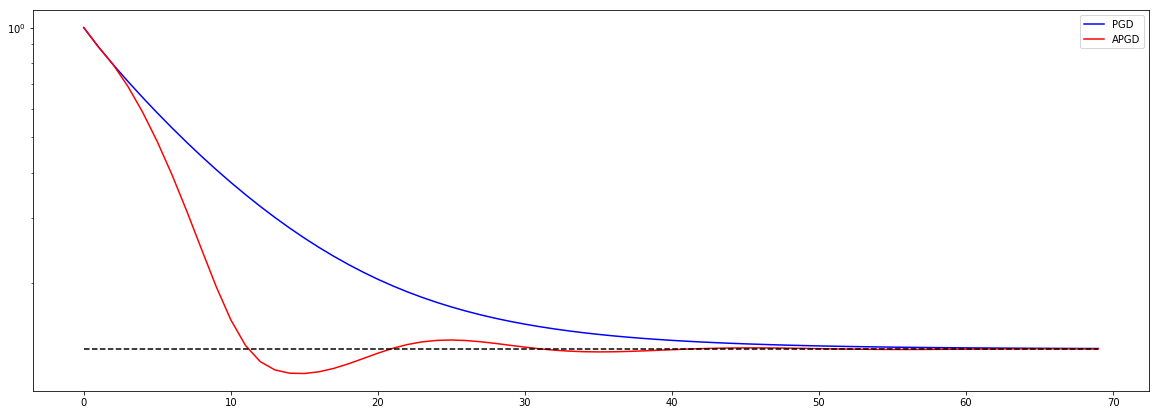

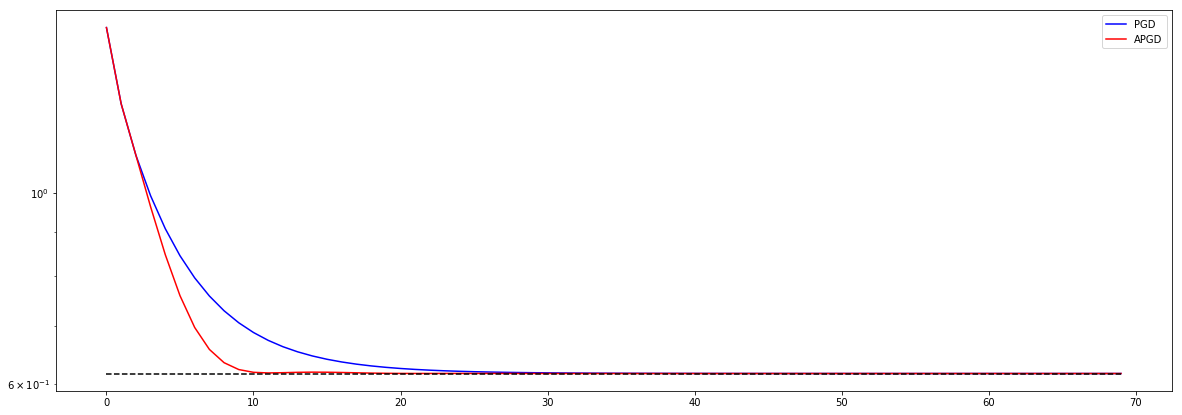

In [18]:
# Let's plot error = norm(x_true-x)/norm(x_true) at each step
max_plot = 70

fig = plt.figure(1, figsize=(20, 7))
plt.yscale("log")
plt.plot(range(max_plot), pgd_err_hat[:max_plot],'b-', label="PGD")
plt.plot(range(max_plot), apgd_err_hat[:max_plot], 'r-', label="APGD")
plt.plot(range(max_plot), np.repeat(apgd_err_hat[-1],max_plot),'k', linestyle='--')
plt.legend()
plt.show()

#We also had the objective of minimizing f(x)+lamba*R(x). Let's plot the curve of his estimate at each step
fig = plt.figure(1, figsize=(20, 7))
plt.yscale("log")
plt.plot(range(max_plot), pgd_obj_hat[:max_plot],'b-', label="PGD")
plt.plot(range(max_plot), apgd_obj_hat[:max_plot], 'r-', label="APGD")
plt.plot(range(max_plot), np.repeat(apgd_obj_hat[-1],max_plot),'k', linestyle='--')
plt.legend()
plt.show()

<b> <font color="blue" size=4px >Answer:</font></b> 

***With the APGD we reach the minimum more quickly. However, it is not monotonous, unlike the PGD which guarantees the right slope line at each stage.In any case, the APGD is better because it guarantees solutions closer to real values in fewer steps.***

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Compare the solution you obtain with ista and fista with the true parameter `coefs` of
  the model. This can be done with `plt.stem` plots.</li>
    <li>In linear regression and logistic regression, study the influence of the correlation 
  of the features on the performance of the optimization algorithms. Explain.</li>
    <li>In linear regression and logistic regression, study the influence of the level of L2 
  penalization on the performance of the optimization algorithms. Explain.</li>
    <li>In linear regression and logistic regression, compare the performance of the optimization
  algorithms for L2 and L1 penalizations. Explain</li>
    </ul>
</div>

<b> <font color="blue" size=4px >Exercise answers</font></b> 

**Influence of the correlation of the features on the performance of the optimization algorithms**

To see the impact of correlation we have see how convergence behaves by setting different values for correlation.

**A** : *We find that the stronger the correlation between the variables, the harder it is for the algorithm to give the right values and the greater the final error.
Indeed, when the variables are highly correlated, we will have a problem of parameter identifiability*

In [0]:
import seaborn as sns
# Define some values for corrélation
corr = [0.01, 0.1, 0.2, 0.4, 0.5, 0.7, 0.9]
max_plot = 70

- ***Influence of correlation in Linear Regression***

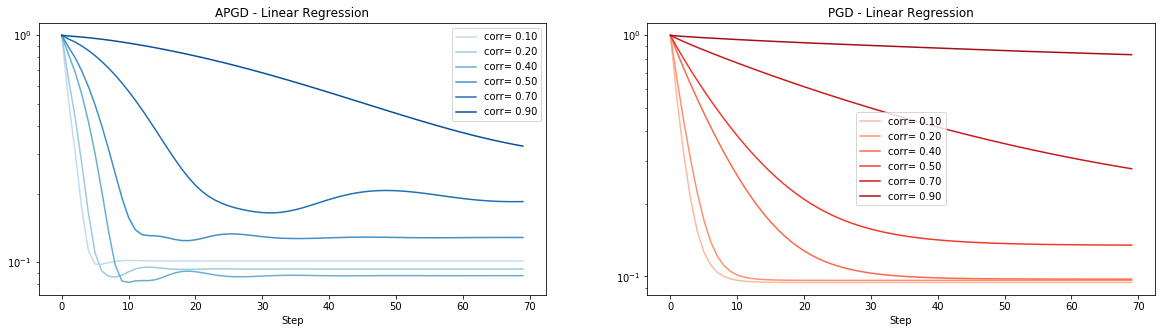

In [20]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
seq_col_brew = sns.color_palette("Blues", len(corr))
for i in np.arange(1,len(corr)):
    A, b = simu_linreg(coefs, corr=corr[i])
    apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L1_norm,
                                prox_R=prox_L1, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',label="corr= %.2f"% corr[i], color=seq_col_brew[i])
    
plt.legend()
plt.xlabel("Step")
plt.title("APGD - Linear Regression")
plt.yscale("log")


## PGD

seq_col_brew = sns.color_palette("Reds", len(corr))
plt.subplot(1, 2, 2)
for i in np.arange(1,len(corr)):
    A, b = simu_linreg(coefs, corr=corr[i])
    pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L1_norm,
                                prox_R=prox_L1, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',label="corr= %.2f"% corr[i], color=seq_col_brew[i])
    
plt.legend()
plt.xlabel("Step")
plt.title("PGD - Linear Regression")
plt.yscale("log")
plt.show()


- **Influence of correlation in Logistic Regression**

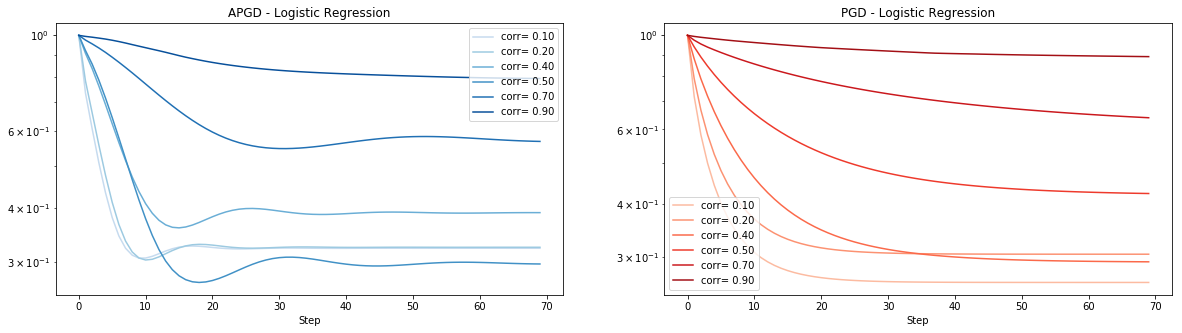

In [21]:
plt.figure(figsize=(20, 5))


seq_col_brew = sns.color_palette("Blues", len(corr))
plt.subplot(1, 2, 1)
# APGD
for i in np.arange(1,len(corr)):
    A, b = simu_logreg(coefs, corr=corr[i])
    apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L1_norm,
                                prox_R=prox_L1, step=smoothness_const_logreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',label="corr= %.2f"% corr[i], color=seq_col_brew[i])
    
plt.legend()
plt.xlabel("Step")
plt.title("APGD - Logistic Regression")
plt.yscale("log")

# PGD
seq_col_brew = sns.color_palette("Reds", len(corr))
plt.subplot(1, 2, 2)
for i in np.arange(1,len(corr)):
    A, b = simu_logreg(coefs, corr=corr[i])
    pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L1_norm,
                                prox_R=prox_L1, step=smoothness_const_logreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',label="corr= %.2f"% corr[i], color=seq_col_brew[i])
    
plt.legend()
plt.xlabel("Step")
plt.title("PGD - Logistic Regression")
plt.yscale("log")
plt.show()

**Influence of the level of L2 penalization**

**A**: *We find that the higher the value of the penalty, the greater the error.*  
*Moreover, the higher the value of the penalty, the smaller the coefficients are because the scale factor ($\frac{1}{(1+\lambda}$) of the proximal of the L2norm is much the closer to zero. So when we initialize to x = 0, we are closer to final parameters if lambda is higher.*


In [0]:
# Define some values for corrélation
lmbda = [0.01, 0.5, 1, 2 , 3, 4, 5]
max_plot = 70

- ***in linear regression***

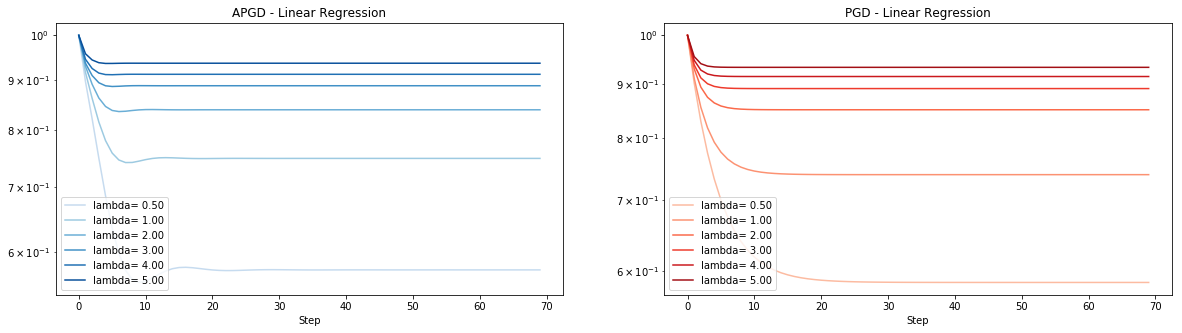

In [23]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
seq_col_brew = sns.color_palette("Blues", len(lmbda))
for i in np.arange(1,len(lmbda)):
    A, b = simu_linreg(coefs)
    apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L2_norm,
                                prox_R=prox_L2, step=smoothness_const_linreg(A), lmbd=lmbda[i], n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',label="lambda= %.2f"% lmbda[i], color=seq_col_brew[i])
    
plt.legend()
plt.xlabel("Step")
plt.title("APGD - Linear Regression")
plt.yscale("log")


## PGD

seq_col_brew = sns.color_palette("Reds", len(lmbda))
plt.subplot(1, 2, 2)
for i in np.arange(1,len(lmbda)):
    A, b = simu_linreg(coefs)
    pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L2_norm,
                                prox_R=prox_L2, step=smoothness_const_linreg(A), lmbd=lmbda[i], n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',label="lambda= %.2f"% lmbda[i], color=seq_col_brew[i])
    
plt.legend()
plt.xlabel("Step")
plt.title("PGD - Linear Regression")
plt.yscale("log")
plt.show()


- ***in logistic regression***

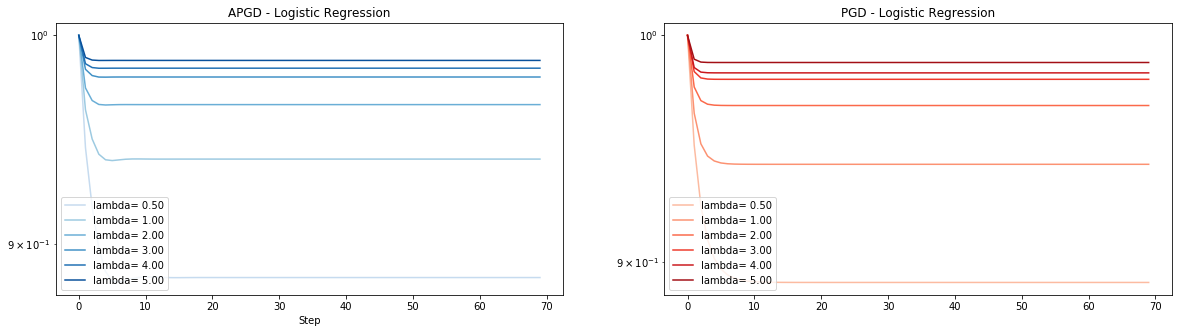

In [24]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)
seq_col_brew = sns.color_palette("Blues", len(lmbda))
for i in np.arange(1,len(lmbda)):
    A, b = simu_logreg(coefs)
    apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L2_norm,
                                prox_R=prox_L2, step=smoothness_const_logreg(A), lmbd=lmbda[i], n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',label="lambda= %.2f"% lmbda[i], color=seq_col_brew[i])
    
plt.legend()
plt.xlabel("Step")
plt.title("APGD - Logistic Regression")
plt.yscale("log")


## PGD

seq_col_brew = sns.color_palette("Reds", len(lmbda))
plt.subplot(1, 2, 2)
for i in np.arange(1,len(lmbda)):
    A, b = simu_logreg(coefs)
    pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L2_norm,
                                prox_R=prox_L2, step=smoothness_const_logreg(A), lmbd=lmbda[i], n_iter=1000, x_true=coefs, verbose=False)
    plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',label="lambda= %.2f"% lmbda[i], color=seq_col_brew[i])
    
plt.legend()
plt.title("PGD - Logistic Regression")
plt.yscale("log")
plt.show()


**Performance comparaison of the optimization algorithms for L2 and L1 penalizations**

**A**:  
*We note that in the case of a linear regression, the penaltization with the L1 norm is slightly faster in convergence than with the L2 norm. And as in our simulation some of our coefficients are zero, penalization with the L1 norm is more appropriate because it forces some of them to be equal zero.*    
*However, in the case of logistic regression, we note the opposite. The L2 penaltization was more faster and give values much closer to the real ones.*


- ***in linear regression***

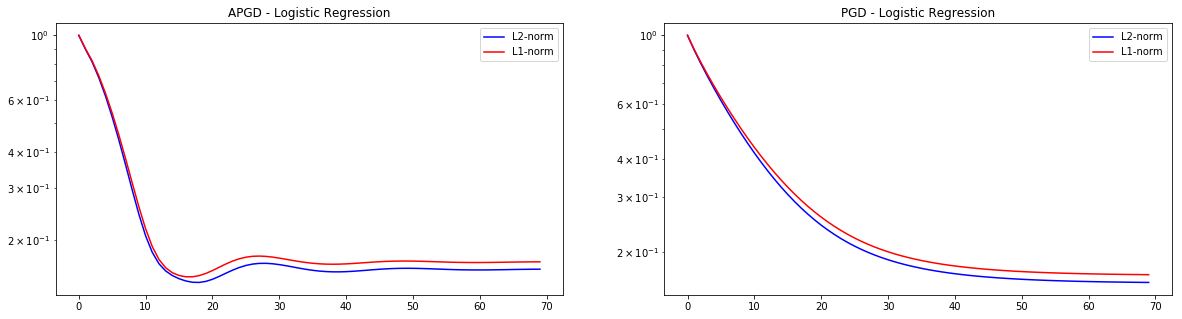

In [25]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

#APGD
A, b = simu_linreg(coefs)
apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L2_norm,
                             prox_R=prox_L2, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)
plt.yscale("log")
plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',color="blue",label ="L2-norm")

apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L1_norm,
                             prox_R=prox_L1, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)

plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',color="red",label ="L1-norm")
plt.title("APGD - Logistic Regression")
plt.legend()

#APGD
plt.subplot(1, 2, 2)
plt.yscale("log")
pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L2_norm,
                             prox_R=prox_L2, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)

plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',color="blue",label ="L2-norm")

pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_linreg, grad_f=grad_linreg, R=L1_norm,
                             prox_R=prox_L1, step=smoothness_const_linreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)

plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',color="red",label ="L1-norm")
plt.title("PGD - Logistic Regression")
plt.legend()

plt.show()


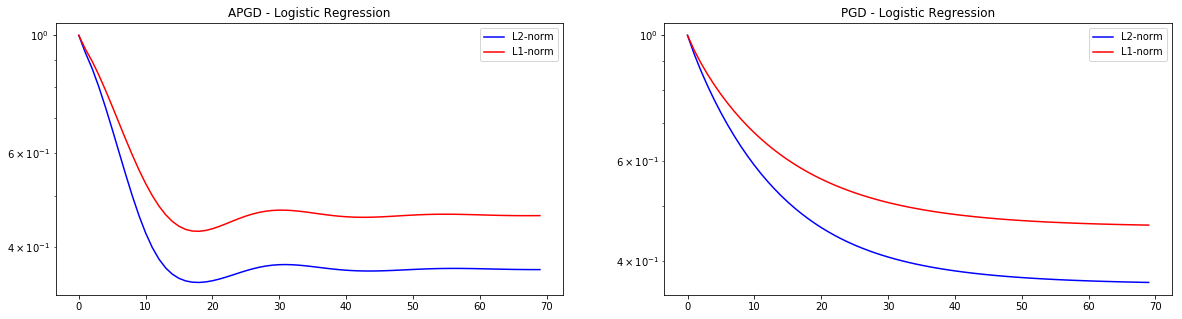

In [26]:
plt.figure(figsize=(20, 5))
plt.subplot(1, 2, 1)

#APGD

A, b = simu_logreg(coefs)
apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L2_norm,
                             prox_R=prox_L2, step=smoothness_const_logreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)
plt.yscale("log")
plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',color="blue",label ="L2-norm")

apgd_x_hat, apgd_obj_hat, apgd_err_hat = APGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L1_norm,
                             prox_R=prox_L1, step=smoothness_const_logreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)

plt.plot(range(max_plot), apgd_err_hat[:max_plot], '-',color="red",label ="L1-norm")
plt.title("APGD - Logistic Regression")
plt.legend()

#APGD

plt.subplot(1, 2, 2)
plt.yscale("log")
pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L2_norm,
                             prox_R=prox_L2, step=smoothness_const_logreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)

plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',color="blue",label ="L2-norm")

pgd_x_hat, pgd_obj_hat, pgd_err_hat = PGD(x0=x0, f=loss_logreg, grad_f=grad_logreg, R=L1_norm,
                             prox_R=prox_L1, step=smoothness_const_logreg(A), lmbd=lmbd, n_iter=1000, x_true=coefs, verbose=False)

plt.plot(range(max_plot), pgd_err_hat[:max_plot], '-',color="red",label ="L1-norm")
plt.title("PGD - Logistic Regression")
plt.legend()
plt.show()
